In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree,preprocessing
from sklearn.metrics import classification_report,confusion_matrix,mean_squared_error
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier

In [4]:
fd=pd.read_csv('Fraud_check.csv')

In [5]:
fd.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [6]:
fd.tail()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO
599,NO,Divorced,96519,158137,16,NO


In [7]:
fd.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [8]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [10]:
fd.shape

(600, 6)

In [11]:
fd.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [12]:
fd.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [13]:
fd.value_counts()

Undergrad  Marital.Status  Taxable.Income  City.Population  Work.Experience  Urban
NO         Divorced        10329           140885           7                YES      1
YES        Married         21966           117250           20               YES      1
                           26679           79683            26               NO       1
                           26741           176050           20               NO       1
                           26793           162777           7                NO       1
                                                                                     ..
NO         Single          22054           91889            16               NO       1
                           22258           63622            17               NO       1
                           23884           111105           8                YES      1
                           24557           32450            19               YES      1
YES        Single          99619     

In [14]:
fd.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


In [17]:
label_encoder=preprocessing.LabelEncoder()

In [24]:
fd.rename(columns={"Marital.Status":"mar_stat","Taxable.Income":"tax_inc","City.Population":"c_pop","Work.Experience":"w_exp"},inplace=True)

In [25]:
fd.head()

,Undergrad,mar_stat,tax_inc,c_pop,w_exp,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [30]:
fd['status']=fd['tax_inc'].apply(lambda tax_inc :'Risky' if tax_inc <=30000 else 'Good')

In [31]:
fd['Undergrad']=label_encoder.fit_transform(fd['Undergrad'])
fd['mar_stat']=label_encoder.fit_transform(fd['mar_stat'])
fd['Urban']=label_encoder.fit_transform(fd['Urban'])
fd['status']=label_encoder.fit_transform(fd['status'])
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Undergrad  600 non-null    int64
 1   mar_stat   600 non-null    int64
 2   tax_inc    600 non-null    int64
 3   c_pop      600 non-null    int64
 4   w_exp      600 non-null    int64
 5   Urban      600 non-null    int64
 6   status     600 non-null    int32
dtypes: int32(1), int64(6)
memory usage: 30.6 KB


In [32]:
fd.head()

,Undergrad,mar_stat,tax_inc,c_pop,w_exp,Urban,status
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0


In [33]:
fd.drop('tax_inc',axis=1,inplace=True)

In [34]:
fd.head()

,Undergrad,mar_stat,c_pop,w_exp,Urban,status
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0


In [35]:
x=fd.iloc[:,0:5]
y=fd.iloc[:,5]
x

,Undergrad,mar_stat,c_pop,w_exp,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [36]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: status, Length: 600, dtype: int32

In [40]:
y.value_counts()

0    476
1    124
Name: status, dtype: int64

0 is for Good 
1 is for Risky

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [39]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(167.40000000000003, 190.26, 'X[2] <= 63983.0\nentropy = 0.722\nsamples = 480\nvalue = [384, 96]'),
 Text(100.44000000000001, 135.9, 'X[3] <= 23.5\nentropy = 0.537\nsamples = 106\nvalue = [93, 13]'),
 Text(66.96000000000001, 81.53999999999999, 'X[2] <= 40128.5\nentropy = 0.635\nsamples = 81\nvalue = [68, 13]'),
 Text(33.480000000000004, 27.180000000000007, 'entropy = 0.811\nsamples = 36\nvalue = [27, 9]'),
 Text(100.44000000000001, 27.180000000000007, 'entropy = 0.433\nsamples = 45\nvalue = [41, 4]'),
 Text(133.92000000000002, 81.53999999999999, 'entropy = 0.0\nsamples = 25\nvalue = [25, 0]'),
 Text(234.36, 135.9, 'X[2] <= 64532.5\nentropy = 0.764\nsamples = 374\nvalue = [291, 83]'),
 Text(200.88000000000002, 81.53999999999999, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(267.84000000000003, 81.53999999999999, 'X[2] <= 130296.0\nentropy = 0.756\nsamples = 372\nvalue = [291, 81]'),
 Text(234.36, 27.180000000000007, 'entropy = 0.813\nsamples = 203\nvalue = [152, 51]'),
 Text

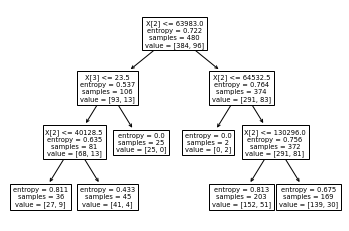

In [41]:
tree.plot_tree(model)

[Text(465.0, 792.75, 'tax_inc <= 63983.0\nentropy = 0.722\nsamples = 480\nvalue = [384, 96]\nclass = Risky'),
 Text(279.0, 566.25, 'c_pop <= 23.5\nentropy = 0.537\nsamples = 106\nvalue = [93, 13]\nclass = Risky'),
 Text(186.0, 339.75, 'tax_inc <= 40128.5\nentropy = 0.635\nsamples = 81\nvalue = [68, 13]\nclass = Risky'),
 Text(93.0, 113.25, 'entropy = 0.811\nsamples = 36\nvalue = [27, 9]\nclass = Risky'),
 Text(279.0, 113.25, 'entropy = 0.433\nsamples = 45\nvalue = [41, 4]\nclass = Risky'),
 Text(372.0, 339.75, 'entropy = 0.0\nsamples = 25\nvalue = [25, 0]\nclass = Risky'),
 Text(651.0, 566.25, 'tax_inc <= 64532.5\nentropy = 0.764\nsamples = 374\nvalue = [291, 83]\nclass = Risky'),
 Text(558.0, 339.75, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = Good'),
 Text(744.0, 339.75, 'tax_inc <= 130296.0\nentropy = 0.756\nsamples = 372\nvalue = [291, 81]\nclass = Risky'),
 Text(651.0, 113.25, 'entropy = 0.813\nsamples = 203\nvalue = [152, 51]\nclass = Risky'),
 Text(837.0, 113.25, 'entro

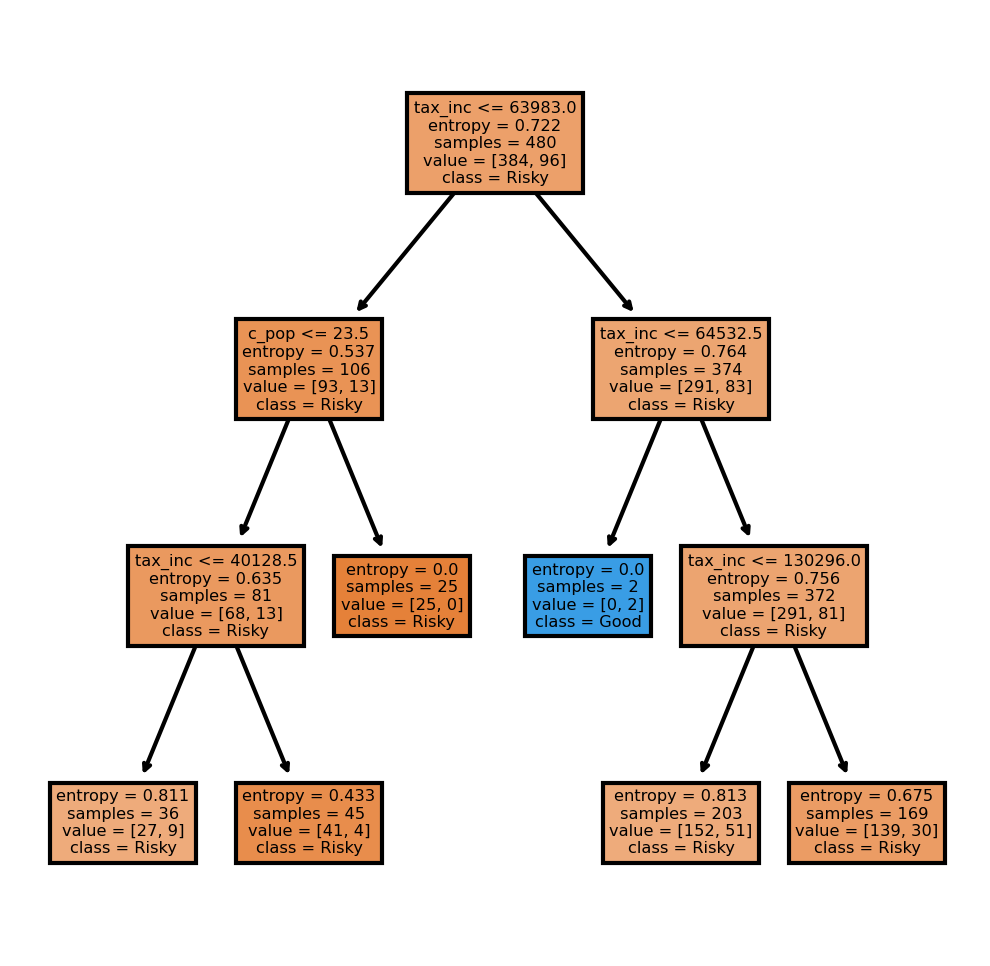

In [42]:
fn=['Undergrad','mar_stat','tax_inc','c_pop','w_exp','Urban']
cn=['Risky','Good']
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300)
tree.plot_tree(model,feature_names=fn,class_names=cn,filled=True)

In [44]:
preds=model.predict(x_test)
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [46]:
pd.Series(preds).value_counts()

0    120
dtype: int64

In [47]:
x_test

,Undergrad,mar_stat,c_pop,w_exp,Urban
159,1,2,28504,1,0
307,0,0,31819,25,0
253,1,2,77256,29,0
528,0,1,172612,10,0
137,1,2,115884,6,0
...,...,...,...,...,...
102,1,0,91488,23,0
577,1,1,52940,5,1
18,1,0,59269,6,0
560,0,0,182562,24,0


In [48]:
y_test

159    0
307    0
253    0
528    0
137    1
      ..
102    0
577    0
18     0
560    0
62     0
Name: status, Length: 120, dtype: int32

In [49]:
pd.crosstab(y_test,preds)

col_0,0
status,
0,92
1,28


In [50]:
np.mean(preds==y_test)

0.7666666666666667

In [54]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87        92
           1       0.00      0.00      0.00        28

    accuracy                           0.77       120
   macro avg       0.38      0.50      0.43       120
weighted avg       0.59      0.77      0.67       120



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Building Decision Tree Classifier with gini criteria

In [57]:
model1=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=40)

In [58]:
model1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=40)

In [59]:
preds1=model.predict(x_test)

In [60]:
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [61]:
model.score(x_train,y_train)

0.8041666666666667

Both the models has predicted above 75% accuracy, which is average accuray. so the model is poor to predict the risk poor